# 회귀 모델
* 1 ~ 10까지 데이터로 학습한 후 101 ~ 110까지 예측하기 

## 0 사용할 패키지 불러오기 

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import random

## 1. 데이터셋 생성하기
* 학습 데이터 
* 테스트 데이터

In [2]:
x_train = np.array([1,2,3,4,5,6,7,8,9,10])
y_train = np.array([1,2,3,4,5,6,7,8,9,10])
x_test = np.array([101,102,103,104,105,106,107,108,109,110])
y_test = np.array([101,102,103,104,105,106,107,108,109,110])

## 2. 모델 구성하기
* Dense 레이어가 두 개인 다층퍼셉트론 모델. 
* 첫 번째 레이어는 5개의 뉴런을 가진 Dense 레이어
    - 오류역전파가 용이한 relu 활성화 함수를 사용.
* 두 번째 레이어는 3개의 뉴런을 가진 Dense 레이어 
* 출력 레이어인 세 번째 레이어는 하나의 수치값을 예측을 하기 위해서 1개의 뉴런을 가지며, 별도의 활성화 함수는 relu를 사용

In [3]:
model = Sequential()
model.add(Dense(5, input_dim =1 , activation='relu'))
model.add(Dense(3))
model.add(Dense(1, activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


## 3. 모델 학습과정 설정하기
#### 모델 컴파일
* 모델을 실행시키지 전에 머신이 이해할 수 있도록 컴파일 시킴
* loss : 손실 마수는 어떤 것을 사용할 것인가? --> mse
* optimizer : 최적화 함수는? --> adam, rmsprop
* metrics : 어떤 방식? --> accuracy, mse(mean squared error) 적용 

In [4]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

## 4. 모델 학습시키기
* epochs : 훈련 횟수
* batch_size : 몇 개씩 끊어서 작업을 할 것인가를 의미 
    - batch_size를 크게 잡을 경우 속도가 빨라지지만 정확도가 떨어짐
    - 작게 잡을 경우 속도는 떨어지지만 정확도는 올라감
* valication_data : 검증 데이터 

In [5]:
hist = model.fit(x_train, y_train, epochs=100, batch_size=1,validation_data = (x_test, y_test))

Train on 10 samples, validate on 10 samples
Epoch 1/100
10/10 [==============================] - 1s 53ms/sample - loss: 1.3564 - accuracy: 0.1000 - val_loss: 320.8551 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 3ms/sample - loss: 0.7829 - accuracy: 0.1000 - val_loss: 196.0735 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 3ms/sample - loss: 0.4118 - accuracy: 0.1000 - val_loss: 105.7481 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 3ms/sample - loss: 0.1862 - accuracy: 0.1000 - val_loss: 50.0622 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 3ms/sample - loss: 0.0644 - accuracy: 0.1000 - val_loss: 21.7566 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 3ms/sample - loss: 0.0150 - accuracy: 0.1000 - val_loss: 10.4026 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 3ms/samp

Epoch 56/100
10/10 [==============================] - 0s 3ms/sample - loss: 3.1765e-04 - accuracy: 0.1000 - val_loss: 0.2668 - val_accuracy: 0.0000e+00
Epoch 57/100
10/10 [==============================] - 0s 3ms/sample - loss: 2.7775e-04 - accuracy: 0.1000 - val_loss: 0.2362 - val_accuracy: 0.0000e+00
Epoch 58/100
10/10 [==============================] - 0s 3ms/sample - loss: 2.6191e-04 - accuracy: 0.1000 - val_loss: 0.2147 - val_accuracy: 0.0000e+00
Epoch 59/100
10/10 [==============================] - 0s 3ms/sample - loss: 2.2980e-04 - accuracy: 0.1000 - val_loss: 0.2166 - val_accuracy: 0.0000e+00
Epoch 60/100
10/10 [==============================] - 0s 3ms/sample - loss: 2.1927e-04 - accuracy: 0.1000 - val_loss: 0.2262 - val_accuracy: 0.0000e+00
Epoch 61/100
10/10 [==============================] - 0s 3ms/sample - loss: 2.0880e-04 - accuracy: 0.1000 - val_loss: 0.1520 - val_accuracy: 0.0000e+00
Epoch 62/100
10/10 [==============================] - 0s 3ms/sample - loss: 1.7238e-04 -

## 5. 학습과정 살펴보기

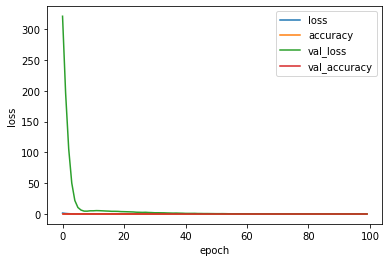

In [6]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['val_accuracy'])
#plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy', 'val_loss', 'val_accuracy'], loc='upper right')
plt.show()

## 6. 모델 평가하기

In [7]:
loss, acc = model.evaluate(x_test, y_test, batch_size =1)
print("loss : ", loss)
print("acc : ", acc )

10/10 [==============================] - 0s 1ms/sample - loss: 0.0015 - accuracy: 0.0000e+00
loss :  0.0014701355015859009
acc :  0.0


## 7. 예측하기 

In [8]:
y_predict = model.predict(x_test)
print("결과물 : \n", y_predict)

결과물 : 
 [[100.96341 ]
 [101.963036]
 [102.96264 ]
 [103.96226 ]
 [104.96186 ]
 [105.96148 ]
 [106.96109 ]
 [107.96071 ]
 [108.96032 ]
 [109.95994 ]]
